<a href="https://colab.research.google.com/github/IvanPP1018/SIMULACION-1/blob/main/Clase%2011/10/2024_sim%20ii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clase 11/10/2024**

**SIMULACIÓN II**

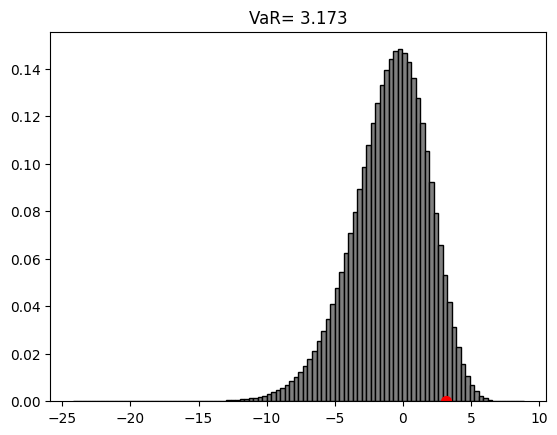

3.172961370690047
3.173011012695351


In [21]:
from random import gauss
import numpy as np
from math import sqrt, exp
import matplotlib.pyplot as plt
from numba import jit
from scipy.stats import norm
@jit(nopython=True)
def lost(p0,u,o,T,ns):
  l=np.zeros(ns)
  raizT=sqrt(T)
  for i in range(ns):
    p=p0*exp((u-o**2/2)*T+o*raizT*gauss(0,1))
    L=p0-p
    l[i]=L
  return l
def va(p0,u,o,T):
    raizT=sqrt(T)
    L=p0*(1-exp((u-o**2/2)*T+o*raizT*norm.ppf(0.05,0,1)))
    return L
ns=10000000
u=0.0021
o=0.0317
T=30
p0=15
l=lost(p0,u,o,T,ns)
VaR=np.quantile(l,0.95)
plt.hist(l,density=1,bins=100,color='grey',edgecolor='black')
plt.scatter([VaR],[0],s=50,color='red')
plt.title('VaR='+"%6.3f"%VaR)
plt.show()
print(VaR)
print(va(p0,u,o,T))

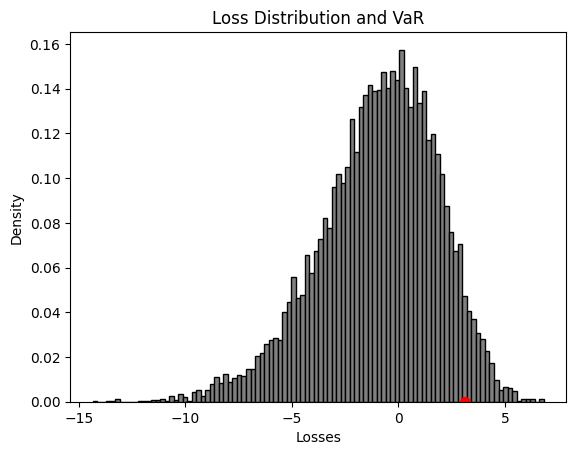

Value at Risk (VaR): 3.0980759905118616


In [11]:
from random import gauss
import numpy as np
from math import sqrt, exp
import matplotlib.pyplot as plt
from numba import jit

@jit(nopython=True)
def lost(p0, u, o, T, ns):
    l = np.zeros(ns)
    raizT = sqrt(T)
    for i in range(ns):
        p = p0 * exp((u - o**2 / 2) * T + o * raizT * gauss(0, 1))
        L = p0 - p
        l[i] = L
    return l

# Parameters
u = 0.0021
o = 0.0317
T = 30
p0 = 15
ns = 10000  # Number of simulations

# Calculate losses and VaR
l = lost(p0, u, o, T, ns)
VaR = np.quantile(l, 0.95)

# Plotting the results
plt.hist(l, density=1, bins=100, color='grey', edgecolor='black')
plt.scatter([VaR], [0], s=50, color='red')
plt.title('Loss Distribution and VaR')
plt.xlabel('Losses')
plt.ylabel('Density')
plt.show()

print("Value at Risk (VaR):", VaR)
